1. Importar todas las librerías necesarias. (+0.15 puntos)

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Inicializar algunas variables que después modificaremos. (+0.15 puntos)

In [ ]:
hostnames = []
dataset = []
df = None

3. Crear una función para generar los hostnames en base a unas reglas
(+1.5 puntos)

In [ ]:
def set_hostnames(number_of_hosts):
    SO_prefix = ["L"]*40 + ["S"]*30 + ["A"]*20 + ["H"]*10
    entorno = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30
    paises = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30

    contador = {}

    for _ in range(number_of_hosts):
        base = random.choice(SO_prefix) + random.choice(entorno) + random.choice(paises)
        contador[base] = contador.get(base, 0) + 1
        hostname = base + str(contador[base]).zfill(3)
        hostnames.append(hostname)

4. Crear una función para obtener el nombre del SO. (+0.5 puntos)

In [ ]:
def get_os(codigo_SO:str) -> str:
    if codigo_SO.startswith("L"):
        return "Linux"
    elif codigo_SO.startswith("S"):
        return "Solaris"
    elif codigo_SO.startswith("A"):
        return "AIX"
    elif codigo_SO.startswith("H"):
        return "HP-UX"
    else:
        return "Unknown"

5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)

In [ ]:
def get_environment(codigo_SO: str) -> str:
    if codigo_SO[1] == "D":
        return "Development"
    elif codigo_SO[1] == "I":
        return "Integration"
    elif codigo_SO[1] == "T":
        return "Testing"
    elif codigo_SO[1] == "S":
        return "Staging"
    elif codigo_SO[1] == "P":
        return "Production"
    else:
        return "Unknown"

6. Crear una función para obtener el nombre del país. (+0.5 puntos)

In [ ]:
def get_country(hostname: str) -> str:
    codigo_pais = hostname[2:5]

    if codigo_pais == "NOR":
        return "Norway"
    elif codigo_pais == "FRA":
        return "France"
    elif codigo_pais == "ITA":
        return "Italy"
    elif codigo_pais == "ESP":
        return "Spain"
    elif codigo_pais == "DEU":
        return "Germany"
    elif codigo_pais == "IRL":
        return "Ireland"
    else:
        return "Unknown"

7. Crear una función para generar el DataFrame. (+1 punto)

In [ ]:
def set_dataframe(count: int) -> None:
    global df, hostnames, dataset

    hostnames.clear()
    dataset.clear()

    set_hostnames(count)

    for hostname in hostnames:
        dataset.append({
            "hostname": hostname,
            "os": get_os(hostname),
            "environment": get_environment(hostname),
            "country": get_country(hostname),
            "node": int(hostname[-3:])
        })

    df = pd.DataFrame(dataset)


8. Crear el DataFrame. (+0.2 puntos)

In [ ]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,STNOR001,Solaris,Testing,Norway,1
1,STITA001,Solaris,Testing,Italy,1
2,AIIRL001,AIX,Integration,Ireland,1
3,SPIRL001,Solaris,Production,Ireland,1
4,ATIRL001,AIX,Testing,Ireland,1
...,...,...,...,...,...
1495,SPIRL035,Solaris,Production,Ireland,35
1496,LIIRL019,Linux,Integration,Ireland,19
1497,ATFRA009,AIX,Testing,France,9
1498,ATIRL025,AIX,Testing,Ireland,25


9. Guardar el DataFrame generado en un fichero CSV. (+0.5 puntos)


In [ ]:
df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,STNOR001,Solaris,Testing,Norway,1
1,STITA001,Solaris,Testing,Italy,1
2,AIIRL001,AIX,Integration,Ireland,1
3,SPIRL001,Solaris,Production,Ireland,1
4,ATIRL001,AIX,Testing,Ireland,1
...,...,...,...,...,...
1495,SPIRL035,Solaris,Production,Ireland,35
1496,LIIRL019,Linux,Integration,Ireland,19
1497,ATFRA009,AIX,Testing,France,9
1498,ATIRL025,AIX,Testing,Ireland,25


10.Generar un único gráfico, agrupando para cada país (country) los
entornos (environment). (+0.5 puntos)

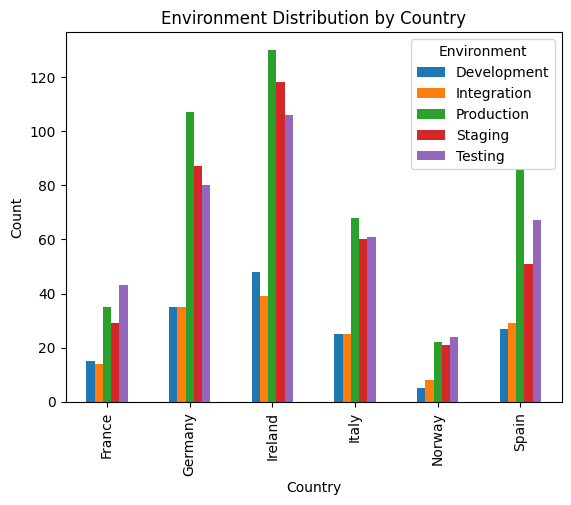

In [ ]:
grouped_data = hosts_df.groupby(['country', 'environment']).size().unstack()

ax = grouped_data.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Environment Distribution by Country')
plt.legend(title='Environment')
plt.show()

11.Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.
(+4.5 puntos)

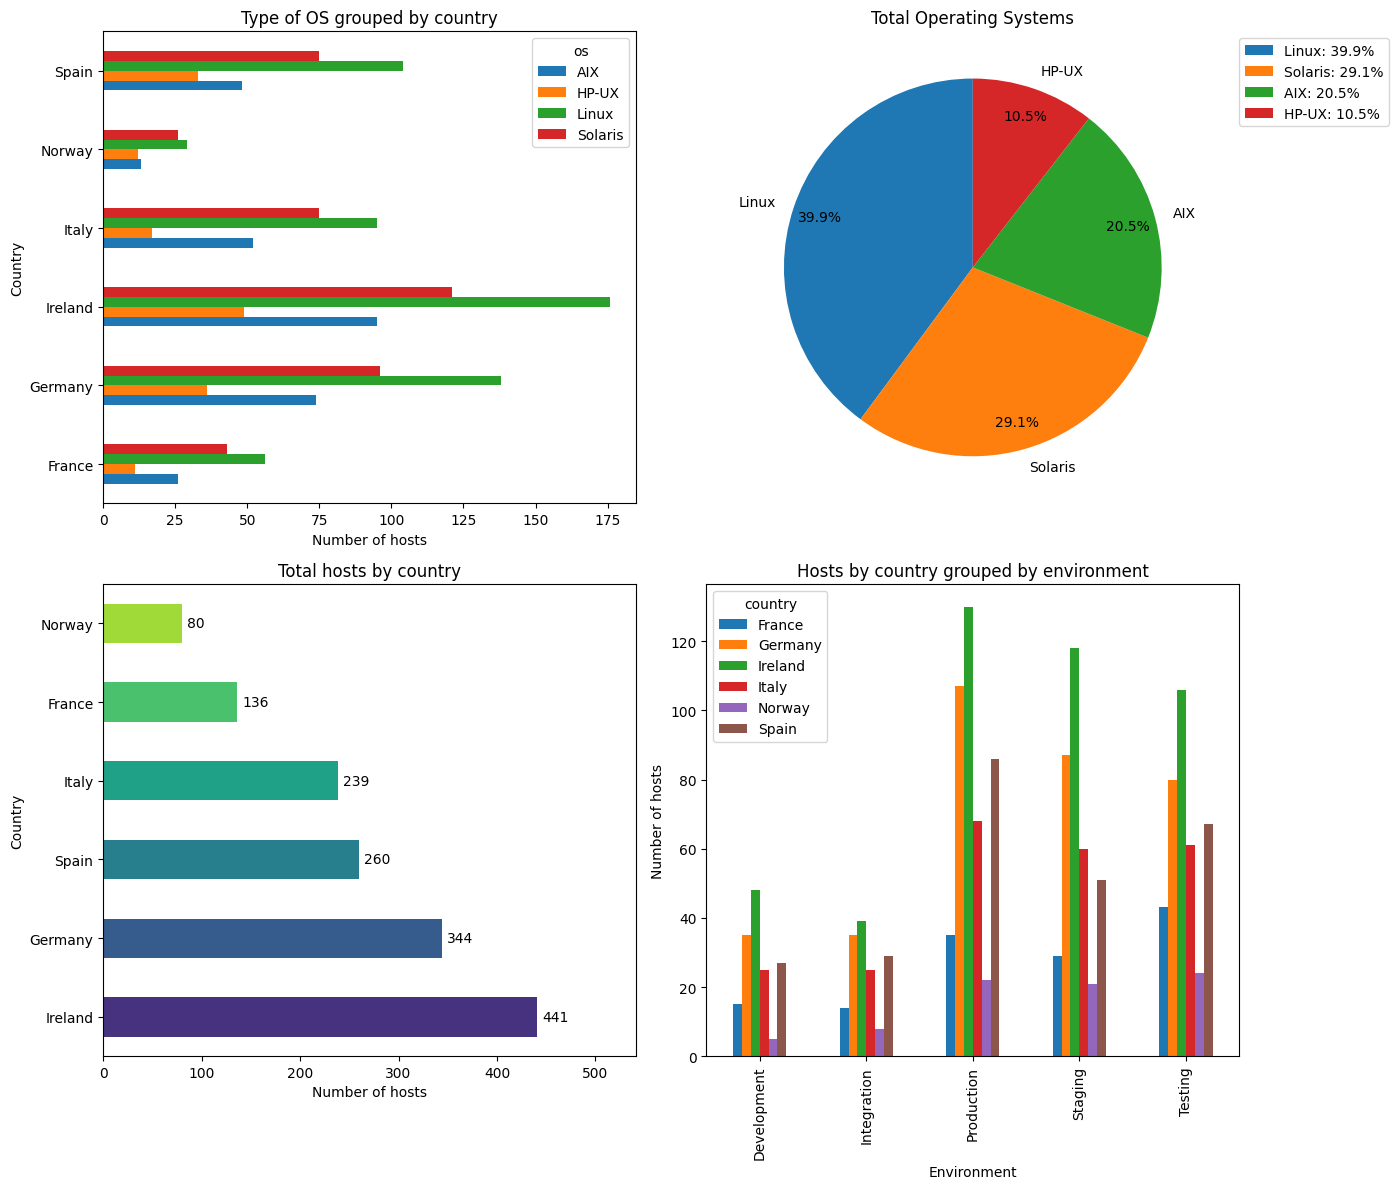

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

#Type of OS grouped by country
grouped_os = hosts_df.groupby(['country', 'os']).size().unstack()
grouped_os.plot(kind='barh', ax=ax[0, 0])
ax[0, 0].set_title('Type of OS grouped by country')
ax[0, 0].set_xlabel('Number of hosts')
ax[0, 0].set_ylabel('Country')

#Total operating systems
total_os = hosts_df['os'].value_counts()
ax[0, 1].pie(total_os, labels=total_os.index, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
ax[0, 1].set_title('Total Operating Systems')
ax[0, 1].legend(labels=[f'{os}: {perc:.1f}%' for os, perc in zip(total_os.index, total_os / len(hosts_df) * 100)],
                bbox_to_anchor=(1.05, 1), loc='upper left')

#Total hosts by country
total_hosts_by_country = hosts_df['country'].value_counts()
colors = sns.color_palette("viridis", len(total_hosts_by_country))
total_hosts_by_country.plot(kind='barh', color=colors, ax=ax[1, 0])
ax[1, 0].set_title('Total hosts by country')
ax[1, 0].set_xlabel('Number of hosts')
ax[1, 0].set_ylabel('Country')
ax[1, 0].set_xlim(0, max(total_hosts_by_country) + 100)

for i, v in enumerate(total_hosts_by_country):
    ax[1, 0].text(v + 5, i, str(v), va='center')

#Hosts by country grouped by environment
grouped_hosts_env = hosts_df.groupby(['country','environment']).size().unstack(0)
grouped_hosts_env.plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Hosts by country grouped by environment')
ax[1, 1].set_xlabel('Environment')
ax[1, 1].set_ylabel('Number of hosts')

fig.tight_layout()
plt.show()
